<a href="https://colab.research.google.com/github/priba/kornia-examples/blob/master/filter_blurring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering Operations

In this tutorial you are going to learn how to use the different filtering operations found in `kornia.filters`.

## Install Kornia

In [12]:
!pip install git+https://github.com/kornia/kornia@anti-alias-resize

  Cloning https://github.com/kornia/kornia (to revision anti-alias-resize) to /tmp/pip-req-build-3ig4kwmz
  Created wheel for kornia: filename=kornia-0.6.0.dev0+594c064-py2.py3-none-any.whl size=275893 sha256=041093324b0aac4105eacf4b7557d947cc24af8cc4d7686f041bd424128e71d2
  Stored in directory: /tmp/pip-ephem-wheel-cache-bg8rw2ta/wheels/1f/32/83/699be48b0d85da10894e565fba5d57e823cc3dac48767ca95c
Successfully built kornia
  Attempting uninstall: kornia
    Found existing installation: kornia 0.6.0.dev0+69478cc
    Uninstalling kornia-0.6.0.dev0+69478cc:
      Successfully uninstalled kornia-0.6.0.dev0+69478cc
You should consider upgrading via the '/home/old-ufo/anaconda3/envs/fastai1/bin/python -m pip install --upgrade pip' command.


## Prepare the data

Download an example image

In [1]:
!wget https://raw.githubusercontent.com/kornia/kornia-examples/master/data/filter/drslump.jpg

--2021-04-28 13:15:21--  https://raw.githubusercontent.com/kornia/kornia-examples/master/data/filter/drslump.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60020 (59K) [image/jpeg]
Saving to: ‘drslump.jpg.2’

drslump.jpg.2       100%[===================>]  58.61K  --.-KB/s    in 0.02s   

2021-04-28 13:15:22 (3.01 MB/s) - ‘drslump.jpg.2’ saved [60020/60020]



Load the image using OpenCV and plot it

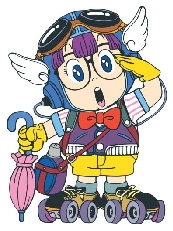

In [13]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import kornia as K

# load using opencv and convert to RGB
img_bgr: np.array = cv2.imread('drslump.jpg', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis('off');

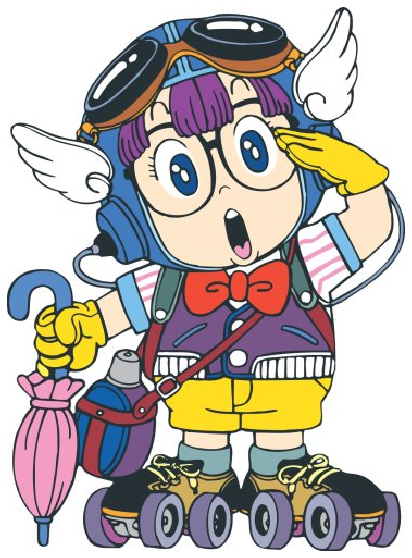

In [14]:
import torch
import torchvision

def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2)
    out_np: np.array = K.tensor_to_image(out)
    plt.figure(figsize=(20,10))
    plt.imshow(out_np); plt.axis('off');

# stack four identical images
data: torch.Tensor = K.image_to_tensor(img_rgb).float()/255.  # 1xCxHxW
# plot
imshow(data)

## Plain resize vs Antializased resize

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


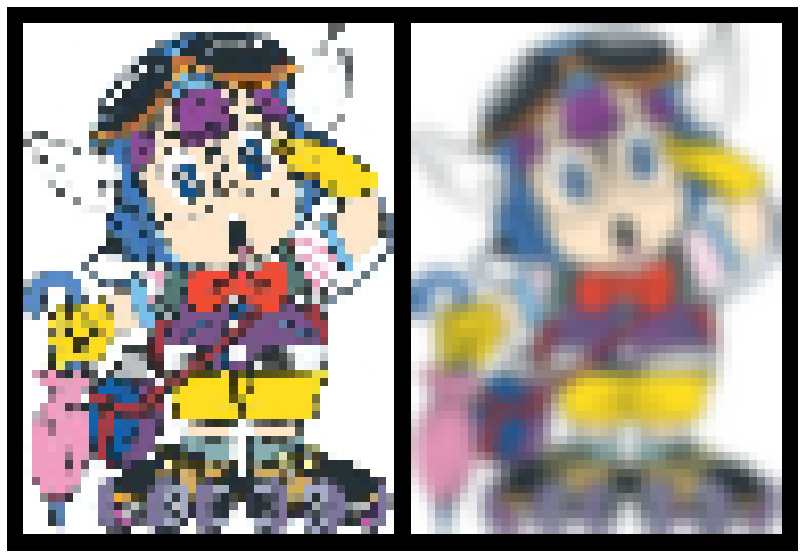

In [15]:

x_025: torch.Tensor = K.rescale(data, (0.125, 0.125))
x_025AA: torch.Tensor = K.rescale(data, (0.125, 0.125), antialias=True)
out = torch.stack([x_025, x_025AA], dim=0)
imshow(out)